In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# Zadanie

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2$, startując z punktu $x=2$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

x: 0.15552


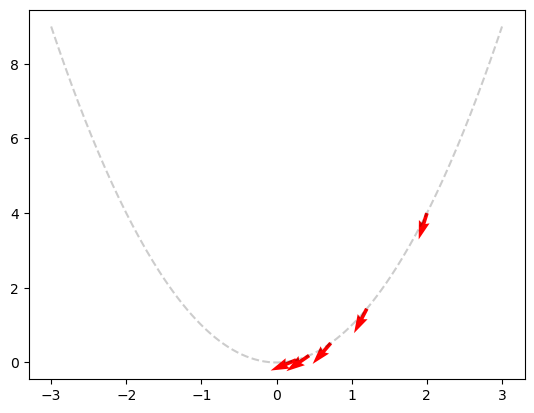

In [71]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2
x = np.linspace(-3, 3, 200)
y = f(x)
plt.plot(x, y, '--k', ms=10, alpha=0.2);


def step_gradient_1d(x_current, learningRate):
    x_gradient = 2*x_current
    new_x = x_current - learningRate * x_gradient
    
    #plt.arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)),
    #          head_width=0.05, head_length=0.5, ec="red", lw=1)

    plt.quiver(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)), color=['r'])
    return new_x
    
def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations):
    x = starting_x
    #print(x)
    for i in range(num_iterations):
        x = step_gradient_1d(x,learning_rate)
        #print(x)
    return x

learning_rate = 0.2
initial_x = 2 
num_iterations = 5
x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)
print('x:', x)

plt.show()

# Zadanie
Wykonaj powyższe zadania dla 
  * learning_rate = 0.001
  * learning_rate = 0.1
  * learning_rate = 0.2
  * learning_rate = 0.5
  * learning_rate = 0.9
  * learning_rate = 0.99
  * learning_rate = 0.999

x_result, learning_rate
(1.980079840159936, 0.001)
(0.65536, 0.1)
(0.15552, 0.2)
(0.0, 0.5)
(-0.6553600000000004, 0.9)
(-1.8078415935999996, 0.99)
(-1.9800798401599358, 0.999)


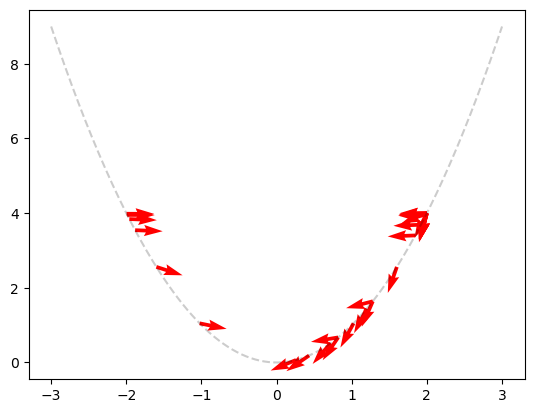

In [72]:
f = lambda x: x**2

x = np.linspace(-3, 3, 200)
y = f(x)
plt.plot(x, y, '--k', ms=10, alpha=0.2);

initial_x = 2 
num_iterations = 5
learning_rates = [0.001, 0.1, 0.2, 0.5, 0.9, 0.99, 0.999]
x_results = []
for learning_rate in learning_rates:
    x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)
    x_results.append(x)

print('x_result, learning_rate')
for i in zip(x_results, learning_rates):
    print(i)

# Zadanie 2

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji 

$$
f(x,y)=4*x^2-2x+y^2,
$$ 

startując z punktu $(x,y)=(2,2)$. Zilustruj całą sytuacje oznaczając na wykresie kilka pierwszych iteracji.
Wykonaj obrazek 3D.

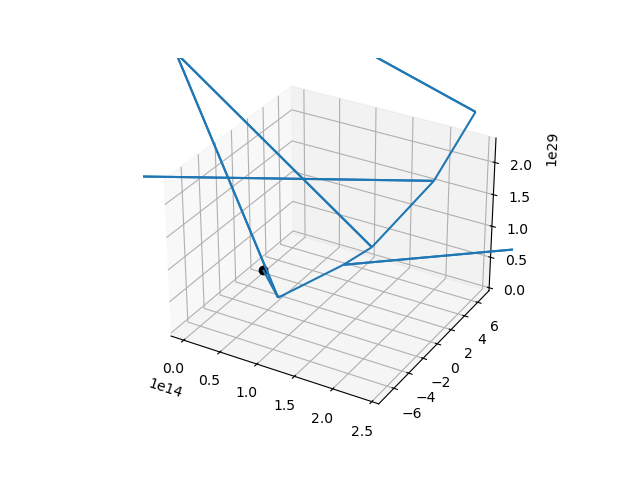

(301428218895267.25, -0.6553600000000004)

In [82]:
###########

import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook
##%matplotlib ipympl

plt.close('all')

fun = lambda x,y: 4*x**2+y**2

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)


#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 8*x - 2
    y_gradient = 2*y_current
    
    new_x = x_current - learningRate *  x_gradient
    new_y = y_current - learningRate *  y_gradient
    
    ax.quiver(x_current, y_current, (fun(x_current, y_current)) ,
              - (learningRate * x_gradient), - (learningRate * y_gradient), 
              (-(fun(x_current,y_current)-fun(new_x,new_y)))) 
    
    return [new_x, new_y]

def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.9
initial_x = 2 # initial y-intercept guess
initial_y = 2 # initial slope guess
num_iterations = 5
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################

plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()
x, y

# Zadanie
Wykonaj analogiczne zadanie ale z:
  * initial_x = 5 
  * initial_y = 0 
  * num_iterations = 10

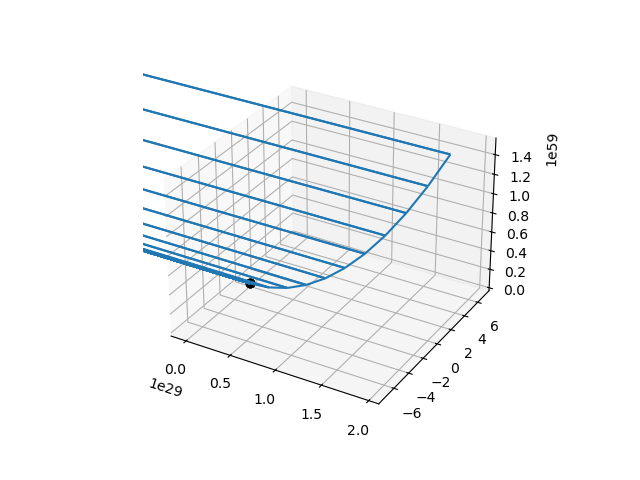

(2.1769270648633704e+29, 0.0)

In [90]:
learning_rate = 0.9
initial_x = 5
initial_y = 0
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)
plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()
x, y

# Zadanie
Wykonaj analogiczne zadanie ale z obrazkiem 2d

$$
f(x,y)=x^2-2x+y^2,
$$ 

oraz

$$
f(x,y)=4*x^2-2x+y^2,
$$ 


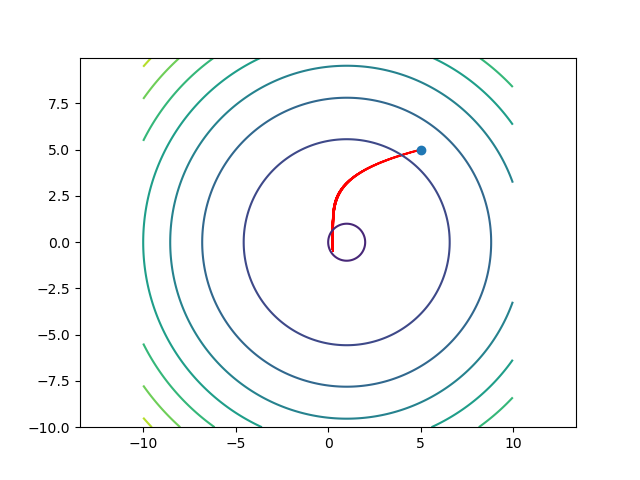

(0.25000000000000067, 0.0002158562370532914)

In [110]:
import numpy as np
import matplotlib.pyplot as plt

chi2 = lambda x,y: x**2-2*x+y**2
x = np.arange(-10,10,0.02)
y = np.arange(-10,10,0.02)
X,Y= np.meshgrid(x,y)
Z = chi2(X,Y)
plt.figure()
plt.contour(X,Y,Z)

#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    #x_gradient = 2*x_current-2  # f(x,y)=x^2-2x+y^2
    x_gradient = 8*x_current-2  # f(x,y)=4*x^2-2x+y^2
    y_gradient = 2*y_current
    
    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)
    
    plt.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.05, head_length=0.5,ec="red")
    #plt.quiver(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient))
    
    return [new_x, new_y]
def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.005
initial_x = 5 # initial y-intercept guess
initial_y = 5 # initial slope guess
num_iterations = 1000
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
plt.plot([initial_x],[initial_y], "o")
plt.axis('equal')
plt.show()

x, y

# Zadanie 3

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2-y^2$, startując z punktu $x=5$ oraz $x=1$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

Wykonaj rysunek:
  
  * 2D conture plot
  * 3D 
  
Co się stanie gdy zaczniemy z punktu $x=5$ oraz $x=0$? 

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

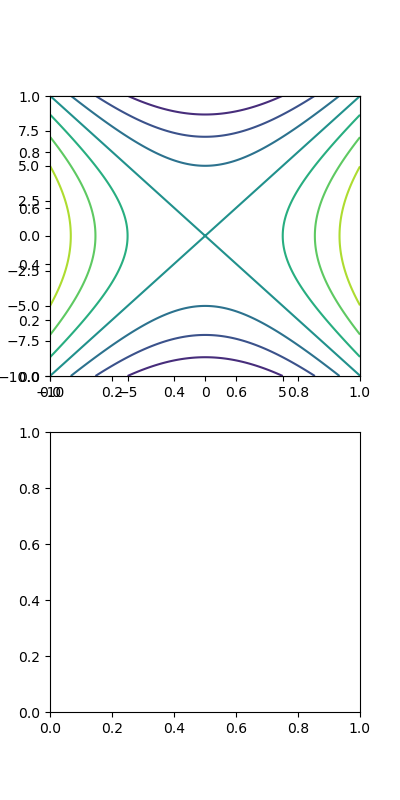

In [174]:
fun = lambda x,y: x**2-y**2
fig, axes = plt.subplots(2, 1, figsize=plt.figaspect(2.))

x1 = np.arange(-10,10,0.02)
y1 = np.arange(-10,10,0.02)
X1, Y1 = np.meshgrid(x1,y1)
axes[0] = fig.add_subplot(2, 1, 1)
axes[0].contour(X1, Y1, fun(X1,Y1))

x2 = np.arange(-7, 7, 0.25)
y2 = np.arange(-7, 7, 0.25)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = fun(X2, Y2)
axes[1] = fig.gca(projection='3d') 
axes[1].plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0.01, antialiased=True, alpha=0.3)


def gradient_step(current_x, current_y, learning_rate):
    gradient_x = 2*current_x
    gradient_y = -2*current_y
    next_x = current_x - (learning_rate * gradient_x)
    next_y = current_y - (learning_rate * gradient_y)

    axes[0].arrow(current_x, current_y, -(learning_rate * gradient_x), -(learning_rate * gradient_y), head_width=0.05, head_length=0.5,ec="red")
    #plt.quiver(current_x, current_y, - (learning_rate * gradient_x), - (learning_rate * gradient_y))

    ax.quiver(current_x,current_y, (fun(current_x,current_y)), -(learning_rate * gradient_x), 
              -(learning_rate * gradient_y), -(fun(current_x,current_y)-fun(next_x,next_y))) 
    return [next_x, next_y]

def gradient_descent_runner(init_x, init_y, learning_rate, iterations):
    x, y = init_x, init_y
    for i in range(iterations):
        x, y = gradient_step(x, y, learning_rate)
    return [x, y]

init_x = 5
init_y = 1
#init_y = 0
learning_rate = 0.2
iterations = 5
[x, y] = gradient_descent_runner(init_x, init_y, learning_rate, iterations)

axes[0].plot([init_x],[init_y], "o")
axes[0].axis('equal')
plt.show()
x, y

#https://matplotlib.org/stable/gallery/mplot3d/mixed_subplots.html